1.         You have a time series of revenue from a particular sport gear store. It is time series with weeks assigned. The time series have seasonality and trend. The goal is to predict the next  10 weeks as accurately as possible. The data is attached in Excel file, please use software that you see fit and provide the code together with your answers. The code has to be run through, that means if I open in R environment I should be able to run end to end and have the forecast in the output. The white paper should have explanation of model selection and the criteria of the choice of the model and parameters if needed.

In [1]:
# Installing packages
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install tensorflow
!pip install keras
!pip install statsmodel


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data Importing

In [3]:
df = pd.read_excel("Time series for STat Take Home test.xlsx")

In [4]:
df.shape

(281, 2)

In [5]:
df.head()


,week,Rev from a Sport Store retail
0,15-W01,9.956822e+05
1,15-W02,1.175470e+06
2,15-W03,1.406700e+06
3,15-W04,1.042557e+06
4,15-W05,1.268013e+06


In [6]:
# renaming revenue variable
df.rename(columns = {'Rev from a Sport Store retail':'revenue'},inplace=True)

In [7]:
df.week.unique()

array(['15-W01', '15-W02', '15-W03', '15-W04', '15-W05', '15-W06',
       '15-W07', '15-W08', '15-W09', '15-W10', '15-W11', '15-W12',
       '15-W13', '15-W14', '15-W15', '15-W16', '15-W17', '15-W18',
       '15-W19', '15-W20', '15-W21', '15-W22', '15-W23', '15-W24',
       '15-W25', '15-W26', '15-W27', '15-W28', '15-W29', '15-W30',
       '15-W31', '15-W32', '15-W33', '15-W34', '15-W35', '15-W36',
       '15-W37', '15-W38', '15-W39', '15-W40', '15-W41', '15-W42',
       '15-W43', '15-W44', '15-W45', '15-W46', '15-W47', '15-W48',
       '15-W49', '15-W50', '15-W51', '15-W52', '16-W01', '16-W02',
       '16-W03', '16-W04', '16-W05', '16-W06', '16-W07', '16-W08',
       '16-W09', '16-W10', '16-W11', '16-W12', '16-W13', '16-W14',
       '16-W15', '16-W16', '16-W17', '16-W18', '16-W19', '16-W20',
       '16-W21', '16-W22', '16-W23', '16-W24', '16-W25', '16-W26',
       '16-W27', '16-W28', '16-W29', '16-W30', '16-W31', '16-W32',
       '16-W33', '16-W34', '16-W35', '16-W36', '16-W37', '16-W

By viewing the unique values of week variable we see that week 20 of year 18 is possibly a human error as all the weeks seem to be in ascending order and only that week's value is not appearing properly(appearing as 18-W whereas it is expected to be 18-W20. Hence, we change its value using the below python code

In [8]:
df.loc[df['week']=='18-W','week']='18-W20'

In [9]:
df.tail(20)

,week,revenue
261,20-W01,1.122936e+06
262,20-W02,1.259626e+06
263,20-W03,1.212462e+06
264,20-W04,1.443774e+06
265,20-W05,1.618276e+06
266,20-W06,1.454491e+06
267,20-W07,1.851955e+06
268,20-W08,2.236988e+06
269,20-W09,1.462602e+06
270,20-W10,1.782698e+06


In [10]:
# We create a year column and week column

def get_year(week_end): # This function takes in week_end date as the input parameter and returns year of the date
    year = week_end.split("-")[0]
    return year

def get_week(week_end): # This function takes in week_end date as the input parameter and returns week of the date
    week = week_end.split("-")[1]
    return week

In [11]:
df['year_num'] = df.apply(lambda row: get_year(row['week']),axis=1)
df['week_num'] = df.apply(lambda row: get_week(row['week']),axis=1)

### Number of weeks per year

In [12]:
df.groupby(['year_num'])['week'].count()

year_num
15       52
16       52
17       53
18       52
19       52
20       10
test_    10
Name: week, dtype: int64

### Histogram of revenue by year

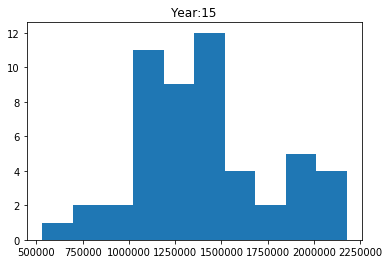

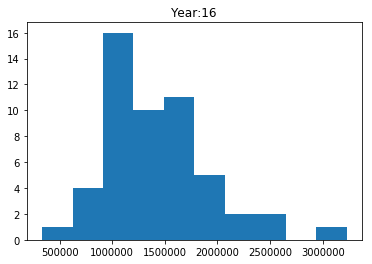

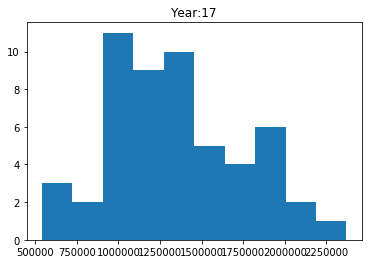

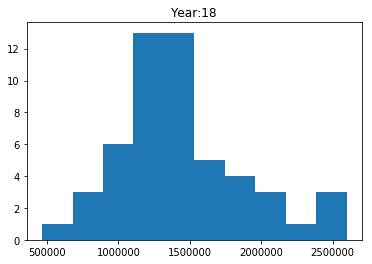

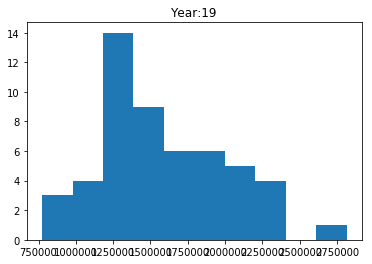

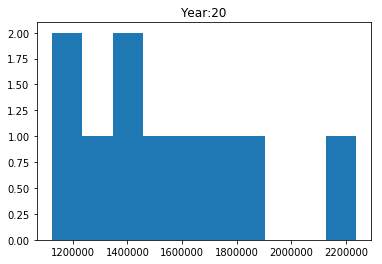

In [13]:

for year, temp_df in df.groupby(['year_num']):
    if year not in ['test_']:
        plt.hist(temp_df.revenue)
        plt.title("Year:"+ year)
        plt.show()

In [14]:
piv_table = pd.pivot_table(df, values='revenue', index='week_num', columns='year_num', aggfunc='sum')
piv_table.reset_index(inplace=True)
piv_table.head()
piv_table = piv_table.query("week_num!='W53'")

In [15]:
piv_table.columns

Index(['week_num', '15', '16', '17', '18', '19', '20', 'test_'], dtype='object', name='year_num')

In [16]:
df.year_num.unique()

array(['15', '16', '17', '18', '19', '20', 'test_'], dtype=object)

## Seasonality and trend analysis

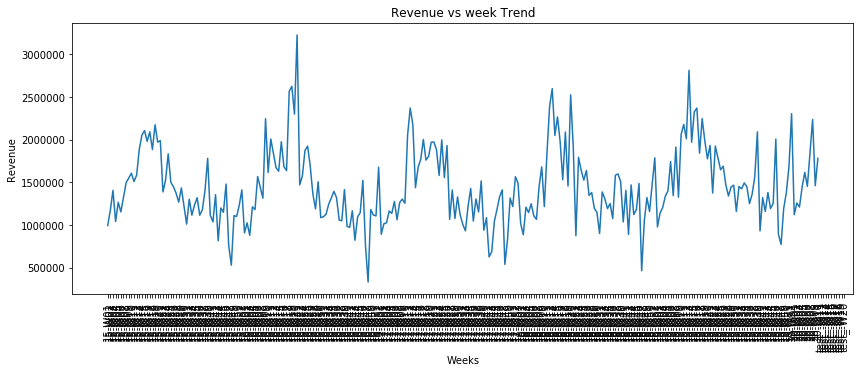

In [17]:
# Plot 1: Trends
plt.figure(figsize=(14,5))
plt.plot(df.week,df.revenue)
plt.xticks(rotation=90)
plt.xlabel("Weeks")
plt.ylabel("Revenue")
plt.title("Revenue vs week Trend")
plt.show()

#### A feeble increasing trend but not very clear - Sales seems to be flat year over year

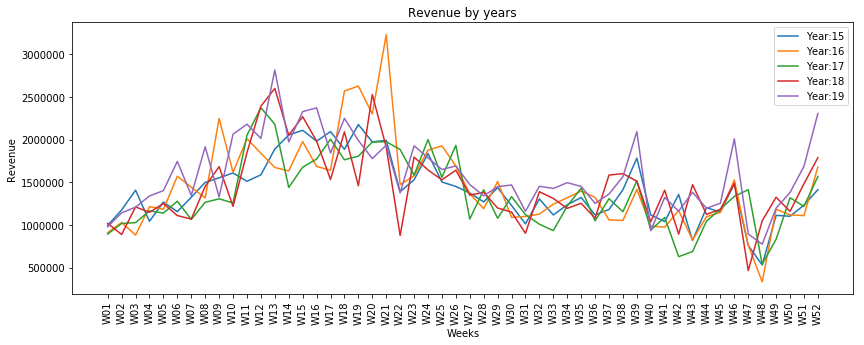

In [18]:
# Plot 2: Seasonality

years = []
all_plots = []
plt.figure(figsize=(14,5))

plt_15, = plt.plot(piv_table['week_num'],piv_table['15'])
plt_16, = plt.plot(piv_table['week_num'],piv_table['16'])
plt_17, = plt.plot(piv_table['week_num'],piv_table['17'])
plt_18, = plt.plot(piv_table['week_num'],piv_table['18'])
plt_19, = plt.plot(piv_table['week_num'],piv_table['19'])

    
    
plt.legend([plt_15,plt_16,plt_17,plt_18,plt_19],[f"Year:{year}" for year in range(15,20)])
plt.xticks(rotation=90)
plt.xlabel("Weeks")
plt.ylabel("Revenue")
plt.title("Revenue by years")
plt.show()

## Analysis so far and next steps:

    Basic analysis of the dataset. The dataset has 281 rows. The  weekly revenues are given from 15 through 19 years. For 20 year the data for only 10 weeks are given from W01 through W10. The objective is to predict for W11 through W20 for '20' year
    
    We have got 53 weeks in 17. We ignore the last week for this year for seasonality analysis. From the Seasanlity and trend analysis, we definitely see a seasonal pattern across weeks. The trend with years is not very visible from the plot
    

Next steps:
    1. We will model the data using three models i.e. Arima, exponential smoothing and LSTM
    2. Model selection strategy: Since the data is following seasonality and we need to predict for weeks 11 through 20 for year=20. We can split the data into training and validation to tune the model. The training dataset will be from 15 through 18 and first 10 weeks of 19. Validation will be from W11 through W20 of year=19. The advantage of doing it this way is that the error that we obtain for 19, similar errors are expected during the prediction of same weeks for year=20. Please note that the final model will be built
    3. Model accuracy metric: 
        To select the best model: Mean absolute percentage error is calculated. We calculate the error percentage between predicted and actual value for W11 through W20 of year = 19 and do an average of that
        To report error metric: Since, these are weekly data, the days in between can have a shift for different years considered. For example, the christmas can fall on first day of the week or last day of the week. If it falls on the first day, the sales are most probably going to happen in the previous week, but if it is falling on the last week, sales will be high during the current week. Hence, more accurate number to show to the business would be doing a sum of predicted revenue of validation dataset and actual revenue of validation dataset and calculating the error percentage which can be used for reporting

### Scaling the revenue:

    Since the revenue values are higher, we divide it by 100k. however we will preserve the decimals so we don't lose on the decimals part during training the model

In [19]:
df['revenue'] = df['revenue']/100000

In [20]:
df.head(20)

,week,revenue,year_num,week_num
0,15-W01,9.956822,15,W01
1,15-W02,11.754698,15,W02
2,15-W03,14.067001,15,W03
3,15-W04,10.425565,15,W04
4,15-W05,12.680131,15,W05
5,15-W06,11.553864,15,W06
6,15-W07,13.238538,15,W07
7,15-W08,14.976529,15,W08
8,15-W09,15.515307,15,W09
9,15-W10,16.083553,15,W10


In [21]:
df['revenue'].describe()

count    271.000000
mean      14.531140
std        4.356253
min        3.341297
25%       11.529589
50%       13.889889
75%       16.885645
max       32.263649
Name: revenue, dtype: float64

### Splitting into training and validation

In [22]:


training = df.query("week<='19-W10'")
#training.index = training.week
validation = df.query("week>='19-W11' and week<= '19-W20'")
#validation.index = validation.week

In [23]:
training.groupby('year_num')['week'].count()

year_num
15    52
16    52
17    53
18    52
19    10
Name: week, dtype: int64

In [24]:
validation.groupby('year_num')['week'].count()

year_num
19    10
Name: week, dtype: int64

# Model 1: Autoregressive integrate Moving average model(ARIMA) 

In [25]:
training_y  = list(training.revenue)
validation_y = list(validation.revenue)

In [26]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [27]:
# Calculating errors on validation
training_for_pred = training_y.copy()

pred = []

for i in range(len(validation)):
    model = ARIMA(training_for_pred, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()[0][0]
    pred.append(output)
    training_for_pred.append(output)

In [28]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
error = mean_absolute_percentage_error(validation_y, pred)
print(error)

15.614991450978009


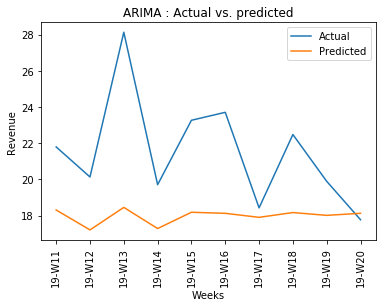

In [30]:
plot1, = plt.plot(validation['week'],validation['revenue'])
plot2, = plt.plot(validation['week'],pred)


    
plt.legend([plot1,plot2],['Actual','Predicted'])
plt.xticks(rotation=90)
plt.xlabel("Weeks")
plt.ylabel("Revenue")
plt.title("ARIMA : Actual vs. predicted")
plt.show()


# Model 2: Exponential Smoothing

In [31]:
import multiprocessing as mp
import operator
from itertools import product
from joblib import Parallel, delayed
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [32]:
GRID_PARAMS = {
    'seasonal':['add'],
    'seasonal_periods': [52],
    'use_boxcox': [True, False],
    'remove_bias': [True, False]  # Updated from 'seed'
}


KEYS = list(GRID_PARAMS) 

In [33]:
def calc_errors_config(training_y, validation_y, a_grid_comb):
    config_dict = dict(zip(KEYS, a_grid_comb))
    training_for_pred = training_y.copy()
    
    pred = []
    for i in range(len(validation_y)):
         
        # define model model
        data=pd.Series(training_for_pred)
        model = ExponentialSmoothing(training_for_pred, trend = None,
                                     seasonal=config_dict['seasonal'], seasonal_periods=config_dict['seasonal_periods'])
        # fit model
        model_fit = model.fit(optimized=True, use_boxcox=config_dict['use_boxcox'], remove_bias=config_dict['remove_bias'])
        # make one step forecast
        output = model_fit.forecast()[0]
        pred.append(output)
        training_for_pred.append(output)  
    
    error = mean_absolute_percentage_error(validation_y, pred)
    config_dict['mape'] = error
    return config_dict

In [34]:
n_cores = mp.cpu_count() - 4

results_list = []
results_list = Parallel(n_jobs=n_cores)(delayed(calc_errors_config)(training_y,validation_y,a_grid_comb)
                                                    for a_grid_comb in product(*map(GRID_PARAMS.get, KEYS)))

error_df = pd.DataFrame.from_dict(results_list, orient='columns')

In [35]:
config_dict = error_df.sort_values('mape').iloc[0].to_dict()
config_dict

{'mape': 12.461313142750438,
 'remove_bias': False,
 'seasonal': 'add',
 'seasonal_periods': 52,
 'use_boxcox': False}

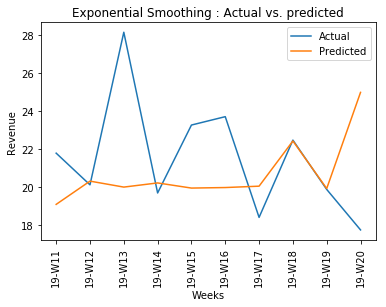

In [36]:
training_for_pred = training_y.copy()

pred = []
for i in range(len(validation_y)):

    # define model model
    model = ExponentialSmoothing(training_for_pred,trend = None,
                                     seasonal=config_dict['seasonal'], seasonal_periods=config_dict['seasonal_periods'])
    # fit model
    model_fit = model.fit(optimized=True, use_boxcox=config_dict['use_boxcox'], remove_bias=config_dict['remove_bias'])
    # make one step forecast
    output = model_fit.forecast()[0]
    pred.append(output)
    training_for_pred.append(output) 

plot1, = plt.plot(validation['week'],validation['revenue'])
plot2, = plt.plot(validation['week'],pred)


    
plt.legend([plot1,plot2],['Actual','Predicted'])
plt.xticks(rotation=90)
plt.xlabel("Weeks")
plt.ylabel("Revenue")
plt.title("Exponential Smoothing : Actual vs. predicted")
plt.show()

In [37]:
error = mean_absolute_percentage_error(validation_y, pred)
print(error)

12.461313142750438


# Model 3: Long Short Term Memory(LSTM)

### Data Preparation for LSTM deep learning model

In [38]:
training_y_copy = training_y.copy()

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.array(training_y).reshape(len(training_y),1))

In [40]:
validation_scaled = sc.transform(np.array(validation_y).reshape(len(validation_y),1))

In [41]:
time_steps = 52

X_train = []
y_train = []
for i in range(time_steps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-time_steps:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [42]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout


Using TensorFlow backend.


In [43]:
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
#model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 20,validation_split = 0.2)


Train on 133 samples, validate on 34 samples
Epoch 1/200
133/133 [==============================] - 1s 5ms/step - loss: 0.0795 - val_loss: 0.0248
Epoch 2/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0332 - val_loss: 0.0148
Epoch 3/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0246 - val_loss: 0.0130
Epoch 4/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0235 - val_loss: 0.0141
Epoch 5/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0225 - val_loss: 0.0144
Epoch 6/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0219 - val_loss: 0.0123
Epoch 7/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.0122
Epoch 8/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0199 - val_loss: 0.0121
Epoch 9/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0191 - val_loss: 0.0114
Epoch 10/200
133/133 [=======================

133/133 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 0.0093
Epoch 79/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0098
Epoch 80/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.0094
Epoch 81/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0095
Epoch 82/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.0109
Epoch 83/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0094
Epoch 84/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 0.0091
Epoch 85/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0105
Epoch 86/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 0.0095
Epoch 87/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 

Epoch 158/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0104
Epoch 159/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0114
Epoch 160/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0103
Epoch 161/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0097
Epoch 162/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0106
Epoch 163/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0131
Epoch 164/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0111
Epoch 165/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0089
Epoch 166/200
133/133 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0099
Epoch 167/200
133/133 [==============================] - 0s 1ms/step - lo

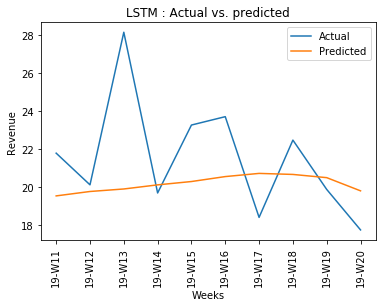

In [44]:
training_for_pred = training_y.copy()

pred = []
for i in range(len(validation_y)):

    X = training_for_pred[-time_steps:] 
    #print(X)
    X = sc.transform(np.array(X).reshape(len(X),1))
    X = X.reshape(1,time_steps,1)
    output = model.predict(X)
    output = sc.inverse_transform(output)[0][0]
    pred.append(output)
    #print(output)
    training_for_pred.append(output) 

plot1, = plt.plot(validation['week'],validation['revenue'])
plot2, = plt.plot(validation['week'],pred)


    
plt.legend([plot1,plot2],['Actual','Predicted'])
plt.xticks(rotation=90)
plt.xlabel("Weeks")
plt.ylabel("Revenue")
plt.title("LSTM : Actual vs. predicted")
plt.show()

In [45]:
error = mean_absolute_percentage_error(validation_y, pred)
print(error)

10.452770209360123


## Deep LSTM

In [46]:
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 10, validation_split = 0.2)

Train on 133 samples, validate on 34 samples
Epoch 1/100
133/133 [==============================] - 2s 13ms/step - loss: 0.0731 - val_loss: 0.0210
Epoch 2/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0423 - val_loss: 0.0280
Epoch 3/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0330 - val_loss: 0.0123
Epoch 4/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0292 - val_loss: 0.0161
Epoch 5/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0290 - val_loss: 0.0135
Epoch 6/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0298 - val_loss: 0.0137
Epoch 7/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0286 - val_loss: 0.0129
Epoch 8/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0268 - val_loss: 0.0117
Epoch 9/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0266 - val_loss: 0.0183
Epoch 10/100
133/133 [=======================

Epoch 81/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0162 - val_loss: 0.0088
Epoch 82/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0144 - val_loss: 0.0101
Epoch 83/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0136 - val_loss: 0.0092
Epoch 84/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0141 - val_loss: 0.0124
Epoch 85/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0151 - val_loss: 0.0106
Epoch 86/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0164 - val_loss: 0.0097
Epoch 87/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0140 - val_loss: 0.0104
Epoch 88/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0134 - val_loss: 0.0088
Epoch 89/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0133 - val_loss: 0.0112
Epoch 90/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0145

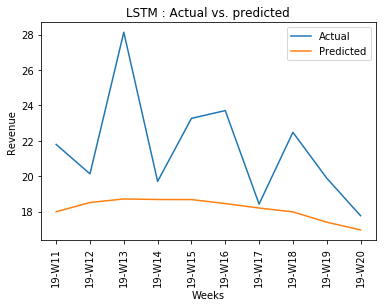

In [47]:
training_for_pred = training_y.copy()

pred = []
for i in range(len(validation_y)):

    X = training_for_pred[-time_steps:] 
    #print(X)
    X = sc.transform(np.array(X).reshape(len(X),1))
    X = X.reshape(1,time_steps,1)
    output = model.predict(X)
    output = sc.inverse_transform(output)[0][0]
    pred.append(output)
    #print(output)
    training_for_pred.append(output) 

plot1, = plt.plot(validation['week'],validation['revenue'])
plot2, = plt.plot(validation['week'],pred)


    
plt.legend([plot1,plot2],['Actual','Predicted'])
plt.xticks(rotation=90)
plt.xlabel("Weeks")
plt.ylabel("Revenue")
plt.title("LSTM : Actual vs. predicted")
plt.show()

In [48]:
error = mean_absolute_percentage_error(validation_y, pred)
print(error)

14.427776668584654


## Model Selection

Although LSTM is one of the best models was not giving a good result in terms of actual vs. predicted graph comparison, as the predicted curve was smoothened. We expect the predictions to be more accurate with lumpy revenues also getting accurately predicted. This is probably because of the fact that we have very less data for training i.e. only 209 rows. We need to have minimum rows for it to capture the pattern. We want to go with exponential smoothing with the results obtained. 

Next steps:

1. Train the dataset with the final config_dict
2. Use the modelt to predict for year=20 and week=11 through 20

In [49]:
training_y = list(df.query("week<='20-W10'")['revenue'])

In [50]:
training_for_pred = training_y.copy()

pred = []
for i in range(len(validation_y)):

    # define model model
    model = ExponentialSmoothing(training_for_pred,trend = None,
                                     seasonal=config_dict['seasonal'], seasonal_periods=config_dict['seasonal_periods'])
    # fit model
    model_fit = model.fit(optimized=True, use_boxcox=config_dict['use_boxcox'], remove_bias=config_dict['remove_bias'])
    # make one step forecast
    output = model_fit.forecast()[0]
    #print(output)
    pred.append(output)
    training_for_pred.append(output) 


In [51]:
df_copy = df.copy()

df.loc[df['year_num']=='test_','revenue'] = pred

In [52]:
output = df[['week','revenue']]
output.loc[:,'revenue'] = output['revenue']*100000

## Final predictions for test period:

In [53]:
output.iloc[-10:]

,week,revenue
271,test_-W11,2.158265e+06
272,test_-W12,2.221744e+06
273,test_-W13,2.299196e+06
274,test_-W14,2.147524e+06
275,test_-W15,2.196559e+06
276,test_-W16,2.206989e+06
277,test_-W17,2.106431e+06
278,test_-W18,2.376424e+06
279,test_-W19,2.124683e+06
280,test_-W20,2.484729e+06
